# Some Sample Datasets

* An example of a synthetic two-class classification dataset is the forge dataset, which has two features.

* The following code creates a scatter plot visualizing all of the data points in this dataset.

* The plot has the first feature on the x-axis and the second feature on the y-axis. As is always the case in scatter plots, each data point is represented as one dot. The color and shape of the dot indicates its class

In [90]:
import mglearn # mglearn library of helper functions to create figures and datasets.
from matplotlib import pyplot as plt # for better visual representation of data

X.shape:- (26, 2)


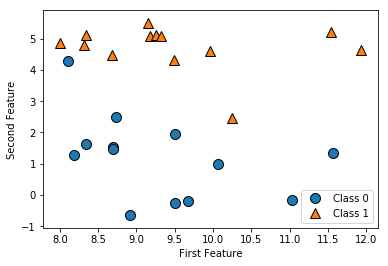

In [91]:
X, y = mglearn.datasets.make_forge() # plot dataset 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 

#Labeling on graph
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape:- {}".format(X.shape))

* To illustrate regression algorithms, we'll use the synthetic wave dataset.
* The wave dataset has a single input feature and a continous target variable(or response) that we want in our model

Text(0,0.5,'Target')

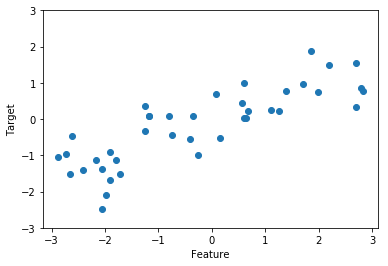

In [92]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

The plot created here shows the single feature on x-axis and the regression target (the output) on the y-axis.


We are using these very simple, low-dimensional datasets because we can easily visualize them- a printed page has two dimensions, so data with more than two features is hard to show. Any intuition derived from datasets with few features (also called low-dimensional datasets) might not hold in datasets with many features (high-dimensional datasets).

# Example:-

We will complement these small synthetic datasets with two real-world datasets that are included in scikit-learn. One is the Wisconsin Breast Cancer dataset (cancer, for short), which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue. 

In [93]:
# The data can be loaded using the load_breast_cancer function from scikit-learn
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer=load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [94]:
# The dataset consist of 569 data points with 30 features each.
print('Shape of cancer data : {}'.format(cancer.data.shape))

Shape of cancer data : (569, 30)


In [95]:
# Out of these data points 212 are labeled as malignant and 357 as benign.
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [96]:
print('Feature names:{}'.format(cancer.feature_names))

Feature names:['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Now as we already know how to make KNN classifier from previous tutorial. By using same concept,proceed

# Split the data for training and testing

In [97]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test=train_test_split(cancer.data,
                                              cancer.target,
                                              random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


# Make DataFrame

In [102]:
import pandas as pd

df=pd.DataFrame(X_train,columns=cancer.feature_names)

# looking at dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


# Building Model

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [115]:
prediction=knn.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# Calculate Model Score

In [118]:
print('Train Test Score: {:.2f}'.format(np.mean(prediction==y_test)))

# or by using knn object 
print('Train Test Score: {:.2f}'.format(knn.score(X_test,y_test)))

Train Test Score: 0.92
Train Test Score: 0.92


# Finished